# Support Vector Machines (SVM)
### A manual implementation of an SVM with Numpy

In [60]:
# Import dependencies
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from random import randint

In [91]:
# First define our data -> liearly separable & 2 classes
#Input data - Of the form [X value, Y value, Bias term]
x = np.array([
    [-2,4,-1],
    [4,1,-1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

#Associated output labels - First 2 examples are labeled '-1' and last 3 are labeled '+1'
y = np.array([-1,-1,1,1,1])

print(x, y)

[[-2  4 -1]
 [ 4  1 -1]
 [ 1  6 -1]
 [ 2  4 -1]
 [ 6  2 -1]] [-1 -1  1  1  1]


In [85]:
df = pd.read_csv('input1.csv', header=None)
# print(df)
x = df[0].values
y = df[1].values
clas = df[2].values
r = [randint(0,len(df)-1) for i in range(5)]
x = np.array([[df.loc[ro][0], df.loc[ro][1], -1] for ro in r])
y = np.array([df.loc[ro][2] for ro in r])
print(x, y)

[[  6   2  -1]
 [  7   7  -1]
 [  8 -11  -1]
 [ 15   5  -1]
 [  9   8  -1]] [ 1 -1  1 -1 -1]


In [70]:
def plot(x, y,plane):
    for i, z in enumerate(x):
        print(x[i], y[i])
        if y[i] == 1:
            plt.plot(x[i][0], x[i][1], 'b.')
        else:
            plt.plot(x[i][0], x[i][1], 'r.')
            
    if len(plane) > 1:
        # plot plane
        # Print the hyperplane calculated by svm_sgd()
        x2=[plane[0],plane[1],-plane[1],plane[0]]
        x3=[plane[0],plane[1],plane[1],-plane[0]]

        x2x3 =np.array([x2,x3])
        X,Y,U,V = zip(*x2x3)
        ax = plt.gca()
        ax.quiver(X,Y,U,V,scale=1, color='blue')
    
    plt.show()

[-2  4 -1] -1
[ 4  1 -1] -1
[ 1  6 -1] 1
[ 2  4 -1] 1
[ 6  2 -1] 1


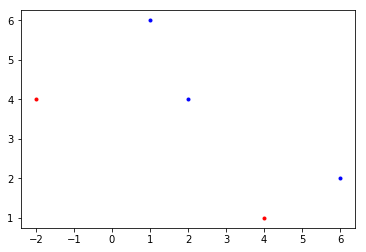

In [92]:
plot(x, y, 'a')

In [95]:
def svm(x, y):
    # Initialize ouir weights as a vector of zeros
    w = np.zeros(len(x[0]))
    # Learning Rate
    eta = 1
    # Number of epochs
    epochs = 100000
    # Record our errors for later plotting
    errors = []
    
    # Training part
    # Classification condition
    for epoch in range(1,epochs):
        # Initialize our error to 0
        error = 0
        # Iterate over each point of our dataset
        for i in range(len(x)):
            if y[i]*np.dot(x[i], w) < 1:
                w = w + eta*( (y[i]*x[i]) - 2*(1/epoch)*w)
                # Count this error
                error = 1
            else:
                w = w + eta*(-2*(1/epoch)*w)
                
            # Add this error to our list
            errors.append(error)
    
    # Plot our errors here
    plt.plot(errors, '|')
    plt.axes().set_yticklabels([])
    plt.ylim(0.5, 1.5)
    plt.xlabel('Epochs')
    plt.ylabel('Misclassified')
    plt.show
    
    return w

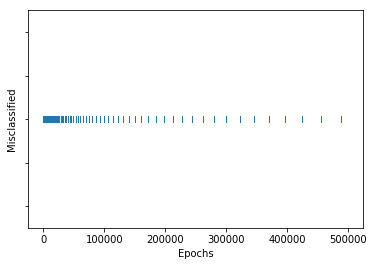

In [96]:
weights = svm(x, y)

[-2  4 -1] -1
[ 4  1 -1] -1
[ 1  6 -1] 1
[ 2  4 -1] 1
[ 6  2 -1] 1


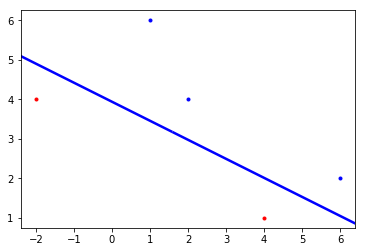

In [97]:
plot(x, y, weights)


In [90]:
print(weights)

[  1.78770021 -11.36797724 -15.07592505]
